### Obtencion de los datos

In [9]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Configura tus credenciales de Spotify
client_id = 'TU_CLIENT_ID'
client_secret = 'TU_CLIENT_SECRET'

# Autenticación
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id='e69f504d89264bda91088369306656da', client_secret='141bfab7fad443a6b7bb79e3703f0903'))

# Función para obtener características de una lista de canciones
def get_track_features(track_ids):
    features = sp.audio_features(track_ids)
    return features

# Buscar canciones por un artista
artist_name = 'Ed Sheeran'
results = sp.search(q='artist:' + artist_name, type='track', limit=50)
tracks = results['tracks']['items']
track_ids = [track['id'] for track in tracks]

# Obtener características de las canciones
track_features = get_track_features(track_ids)

# Crear un DataFrame con las características de las canciones
import pandas as pd

track_df = pd.DataFrame(track_features)
track_df = track_df[['id', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]


In [20]:
### Funcion de llamado de API para obtener 500 nombres de artistas
def get_relevant_artists(limit=500):
    artists = []
    offset = 0

    while len(artists) < limit:
        # La API de Spotify permite un máximo de 50 resultados por solicitud
        results = sp.search(q='year:2023', type='artist', limit=50, offset=offset)
        for item in results['artists']['items']:
            if len(artists) < limit:
                artists.append(item['name'])
        offset += 50

    return artists


In [21]:
jeje  = get_relevant_artists()

In [22]:
len(jeje)

500

In [26]:
### Funcion de obtencio nde informacion de canciones

def get_info_artist(artist_name):
    try:
        results = sp.search(q='artist:' + artist_name, type='track', limit=50)
        tracks = results['tracks']['items']
        track_ids = [track['id'] for track in tracks]

        # Obtener características de las canciones
        track_features = get_track_features(track_ids)

        # Crear un DataFrame con las características de las canciones

        track_df = pd.DataFrame(track_features)
        track_df = track_df[['id', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
        return track_df
    except:
        return pd.DataFrame()

In [27]:
lista = []
for artist in jeje:
    print(artist)
    lista.append(get_info_artist(artist))

Taylor Swift
Drake
Zach Bryan
Sabrina Carpenter
Morgan Wallen
Post Malone
Future
Travis Scott
Kanye West
Billie Eilish
Kendrick Lamar
The Weeknd
Chappell Roan
Eminem
Bad Bunny
$uicideboy$
Peso Pluma
Luke Combs
21 Savage
Metro Boomin
SZA
Bruno Mars
Noah Kahan
Lana Del Rey
Juice WRLD
Rihanna
Ariana Grande
Lil Wayne
Playboi Carti
Lil Baby
XXXTENTACION
Charli xcx
J. Cole
Tyler, The Creator
Gunna
Fuerza Regida
Linkin Park
Junior H
Lil Uzi Vert
KAROL G
Hozier
Lady Gaga
Olivia Rodrigo
Chris Brown
Don Toliver
Brent Faiyaz
Nicki Minaj
A$AP Rocky
Feid
Chris Stapleton
Justin Bieber
YoungBoy Never Broke Again
Young Thug
Coldplay
Disney
Rauw Alejandro
Jelly Roll
Beyoncé
Gracie Abrams
Doja Cat
Mac Miller
Lil Peep
Kali Uchis
Ty Dolla $ign
Benson Boone
Megan Thee Stallion
David Guetta
Imagine Dragons
Ken Carson
Jimin
Lil Tecca
Khalid
Natanael Cano
BigXthaPlug
Kodak Black
The Beatles
The Kid LAROI
Bryson Tiller
Dua Lipa
Steve Lacy
TV Girl
JAY-Z
Tyler Childers
Mitski
Lil Durk
Calmly
Tate McRae
Childish 

In [28]:
dfs = pd.concat(lista,ignore_index=True)

In [59]:
dfs.to_csv('data_entrenamiento.csv')

In [32]:
dfs[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.055306,0.006468,0.277659,-0.104826,0.253364,-0.193071,-0.269201,-0.110075,0.400387,-0.081195
energy,0.055306,1.000000,0.034343,0.658862,-0.084205,0.044661,-0.614332,-0.108459,0.167893,0.317637,0.125205
key,0.006468,0.034343,1.000000,-0.010205,-0.147106,0.003900,-0.009800,0.022009,0.006230,0.045592,0.005488
loudness,0.277659,0.658862,-0.010205,1.000000,-0.034059,0.062416,-0.522415,-0.461482,0.055957,0.273333,0.118059
mode,-0.104826,-0.084205,-0.147106,-0.034059,1.000000,-0.091884,0.058794,-0.018352,-0.011112,-0.015893,0.019996
speechiness,0.253364,0.044661,0.003900,0.062416,-0.091884,1.000000,-0.097894,-0.120721,0.057872,0.042212,0.083434
acousticness,-0.193071,-0.614332,-0.009800,-0.522415,0.058794,-0.097894,1.000000,0.175187,-0.078770,-0.131309,-0.121115
instrumentalness,-0.269201,-0.108459,0.022009,-0.461482,-0.018352,-0.120721,0.175187,1.000000,0.004841,-0.176825,-0.054949
liveness,-0.110075,0.167893,0.006230,0.055957,-0.011112,0.057872,-0.078770,0.004841,1.000000,0.010739,0.004161
valence,0.400387,0.317637,0.045592,0.273333,-0.015893,0.042212,-0.131309,-0.176825,0.010739,1.000000,0.040207


In [34]:
### Estandarizacion
from sklearn.preprocessing import StandardScaler

# Separar la variable binaria "mode"
mode = dfs['mode']
ids = dfs['id']

# Seleccionar solo las variables continuas para estandarizar
continuous_features = dfs.drop(columns=['id','mode'])

# Estandarizar las variables continuas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(continuous_features)

# Crear un nuevo DataFrame con las variables estandarizadas
scaled_df = pd.DataFrame(scaled_features, columns=continuous_features.columns)

# Añadir de nuevo la variable "mode" no estandarizada
scaled_df['mode'] = mode
scaled_df['id'] = ids

print(scaled_df.head())


   danceability    energy       key  loudness  speechiness  acousticness  \
0     -0.447756  0.259388  1.029683  0.332060     0.507346     -0.447575   
1     -0.739593 -1.362371  1.583545 -1.064812    -0.705120      1.023431   
2      0.500716  1.342271 -1.462695  0.293619    -0.660925     -0.886393   
3      0.458156  0.510863 -1.462695 -0.379234    -0.518734     -0.424650   
4      0.458156  0.510863 -1.462695 -0.305533    -0.448600     -0.313847   

   instrumentalness  liveness   valence     tempo  mode  \
0         -0.259734 -0.567511  0.279521  1.634167     1   
1         -0.259767 -0.626936 -0.898812  2.390072     1   
2         -0.259635  0.020061 -0.615679  0.192039     1   
3         -0.259862 -0.267048 -1.152799  0.260417     1   
4         -0.259862 -0.373879 -1.077852  0.258494     1   

                       id  
0  1BxfuPKGuaTgP7aM0Bbdwr  
1  2OzhQlSqBEmt7hmkYxfT6m  
2  0hFF0aqyjDwDh6SQwRbTyx  
3  4q5YezDOIPcoLr8R81x9qy  
4  6zpL5ceKCUy7dipRdWjVtA  


In [60]:
scaled_df.to_csv('data_escalada_entrenamiento.csv')

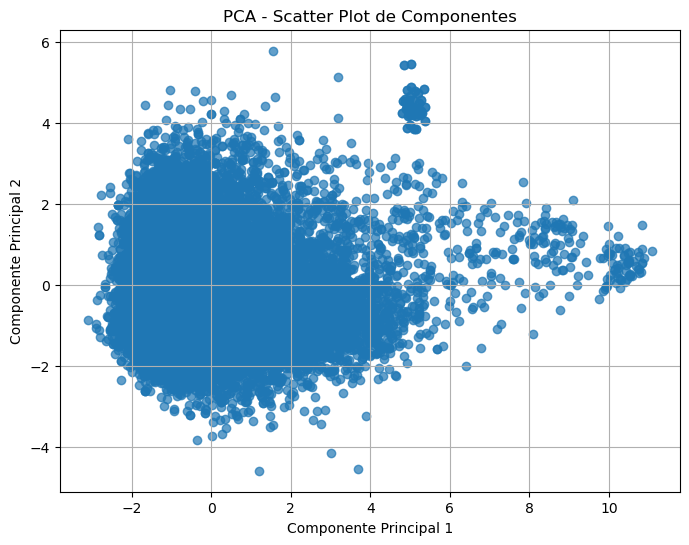

In [35]:
### Visualizacion de resultados

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

# Crear un DataFrame con los componentes
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])

# Visualizar en un scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.title('PCA - Scatter Plot de Componentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()

In [36]:
### Obtencuos de mejor modelo
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 7),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(scaled_df.drop('id',axis=1))

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 7)},
             scoring=<function gmm_bic_score at 0x0000019C83E93F70>)

In [39]:
grid_search.best_estimator_

GaussianMixture(n_components=6)

In [37]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()



,Number of components,Type of covariance,BIC score
23,6,full,68308.351555
21,4,full,72049.639132
17,6,diag,74462.130010
22,5,full,77781.698359
16,5,diag,83109.762147


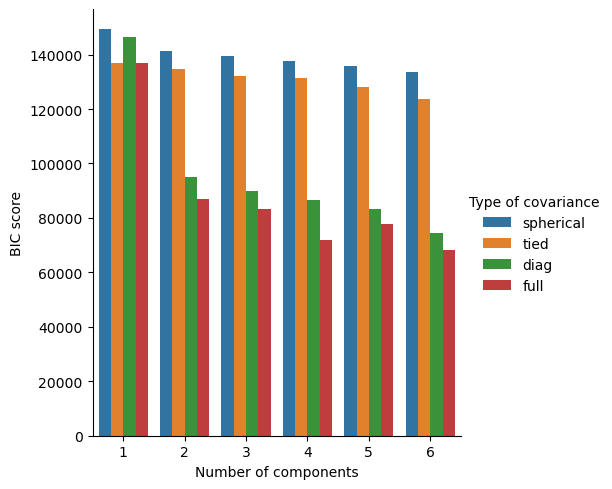

In [38]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [48]:
best_estimator = grid_search.best_estimator_

In [49]:
data_label = scaled_df.drop('id',axis=1).copy()
data_label['Cluster'] = best_estimator.predict(data_label)
pca_df['Cluster'] = data_label['Cluster'].copy()

In [73]:
data_label['id'] = scaled_df['id'].copy()

In [51]:
dfs['Cluster'] = data_label['Cluster'].copy()

### Documentación de Variables del Método `audio_features` de la API de Spotify

El método `audio_features` de la API de Spotify proporciona diversas características de audio para una canción específica. Estas características son útiles para análisis de música, sistemas de recomendación, y estudios de patrones en la música.

#### Variables de una Canción (Track)

##### `id`
- **Descripción**: El identificador único de la canción en Spotify.
- **Tipo**: String
- **Ejemplo**: `"3n3Ppam7vgaVa1iaRUc9Lp"`

##### `danceability`
- **Descripción**: Medida de cuán adecuada es una pista para bailar basada en una combinación de elementos musicales, incluyendo tempo, estabilidad del ritmo, fuerza del beat, y regularidad.
- **Tipo**: Float (valor entre 0.0 y 1.0)
- **Ejemplo**: `0.808`

##### `energy`
- **Descripción**: Medida de intensidad y actividad de una pista. Generalmente, las pistas rápidas, ruidosas y ruidosas tienen valores altos de energía.
- **Tipo**: Float (valor entre 0.0 y 1.0)
- **Ejemplo**: `0.626`

##### `key`
- **Descripción**: La clave musical de la pista. Los enteros se mapean a pitches usando la notación estándar Pitch Class.
- **Tipo**: Integer (valor entre 0 y 11)
- **Ejemplo**: `5` (F)

##### `loudness`
- **Descripción**: El volumen general de una pista en decibelios (dB). Los valores típicamente oscilan entre -60 y 0 dB.
- **Tipo**: Float
- **Ejemplo**: `-12.733`

##### `mode`
- **Descripción**: Modalidad de la pista: mayor (1) o menor (0).
- **Tipo**: Integer (0 o 1)
- **Ejemplo**: `1`

##### `speechiness`
- **Descripción**: Medida de la cantidad de palabras habladas en una pista. Valores más altos indican más contenido hablado.
- **Tipo**: Float (valor entre 0.0 y 1.0)
- **Ejemplo**: `0.0556`

##### `acousticness`
- **Descripción**: Medida de cuán acústica es una pista. Valores más altos representan una mayor probabilidad de que la pista sea acústica.
- **Tipo**: Float (valor entre 0.0 y 1.0)
- **Ejemplo**: `0.514`

##### `instrumentalness`
- **Descripción**: Predice si una pista no contiene voces. Valores más altos representan una mayor probabilidad de que la pista sea instrumental.
- **Tipo**: Float (valor entre 0.0 y 1.0)
- **Ejemplo**: `0.00966`

##### `liveness`
- **Descripción**: Medida de la presencia de una audiencia en la grabación. Valores más altos indican una mayor probabilidad de que la pista se grabó en vivo.
- **Tipo**: Float (valor entre 0.0 y 1.0)
- **Ejemplo**: `0.159`

##### `valence`
- **Descripción**: Medida de la positividad musical que transmite una pista. Pistas con valores más altos suenan más positivas (por ejemplo, felices, alegres).
- **Tipo**: Float (valor entre 0.0 y 1.0)
- **Ejemplo**: `0.624`

##### `tempo`
- **Descripción**: El tempo general de una pista en pulsos por minuto (BPM).
- **Tipo**: Float
- **Ejemplo**: `95.977`

##### `duration_ms`
- **Descripción**: La duración de la pista en milisegundos.
- **Tipo**: Integer
- **Ejemplo**: `233712`

##### `time_signature`
- **Descripción**: La firma de tiempo de una pista. Se estima el número de pulsos por compás.
- **Tipo**: Integer
- **Ejemplo**: `4`

##### `track_href`
- **Descripción**: La URL del API para obtener información detallada sobre la pista.
- **Tipo**: String
- **Ejemplo**: `"https://api.spotify.com/v1/tracks/3n3Ppam7vgaVa1iaRUc9Lp"`

##### `analysis_url`
- **Descripción**: La URL del API para obtener el análisis completo de audio de la pista.
- **Tipo**: String
- **Ejemplo**: `"https://api.spotify.com/v1/audio-analysis/3n3Ppam7vgaVa1iaRUc9Lp"`

##### `uri`
- **Descripción**: El identificador URI de Spotify para la pista.
- **Tipo**: String
- **Ejemplo**: `"spotify:track:3n3Ppam7vgaVa1iaRUc9Lp"`



| Cluster | Perfil Musical | Características Destacadas |
|---|---|---|
| 0 | Pop/Dance moderadamente enérgico con elementos acústicos | `danceability` y `valence` moderados, `energy` y `loudness` ligeramente por debajo del promedio, presencia de `acousticness` |
| 1 | Pop/Rock con tendencia al rock alternativo | `energy` y `loudness` ligeramente por encima del promedio, `danceability` moderada, `acousticness` relativamente baja, `tempo` ligeramente más bajo |
| 2 | Baladas o canciones acústicas | `acousticness` muy alta, `instrumentalness` baja, `valence` y `energy` relativamente bajas |
| 3 | Pop/Rock enérgico con elementos electrónicos | `energy` y `loudness` muy altos, `tempo` rápido, `danceability` moderada, `acousticness` baja, `instrumentalness` baja |
| 4 | Pop/Dance muy enérgico | `danceability`, `energy`, y `valence` altas, `tempo` moderadamente rápido, `loudness` alto |
| 5 | Pop/Dance electrónico | `danceability`, `energy`, y `valence` altas, `tempo` rápido, `acousticness` y `instrumentalness` muy bajas |

In [57]:
dfs.groupby('Cluster').agg({'mode':'mean','valence':'mean','tempo':'mean','danceability':'mean','energy':'mean','liveness':'mean','key':'mean','loudness':'mean','speechiness':'mean','acousticness':'mean','instrumentalness':'mean'})

,mode,valence,tempo,danceability,energy,liveness,key,loudness,speechiness,acousticness,instrumentalness
Cluster,,,,,,,,,,,
0,0.654630,0.486605,121.219553,0.610939,0.621951,0.219972,5.181019,-8.218573,0.086552,0.292303,0.031742
1,0.605216,0.358847,117.103788,0.485905,0.565132,0.185945,5.561944,-12.600194,0.054026,0.386559,0.558895
2,0.756635,0.420932,117.289140,0.562464,0.442368,0.110945,5.184973,-9.427629,0.038183,0.551396,0.000493
3,0.612931,0.434420,131.716234,0.518697,0.843907,0.206879,5.660345,-5.159603,0.069730,0.006693,0.007216
4,0.574897,0.517678,123.950716,0.684850,0.658736,0.238490,5.215753,-6.446875,0.203015,0.214015,0.000025
5,0.637123,0.535882,122.472566,0.632071,0.701543,0.157363,5.292086,-5.593103,0.047733,0.150741,0.000031


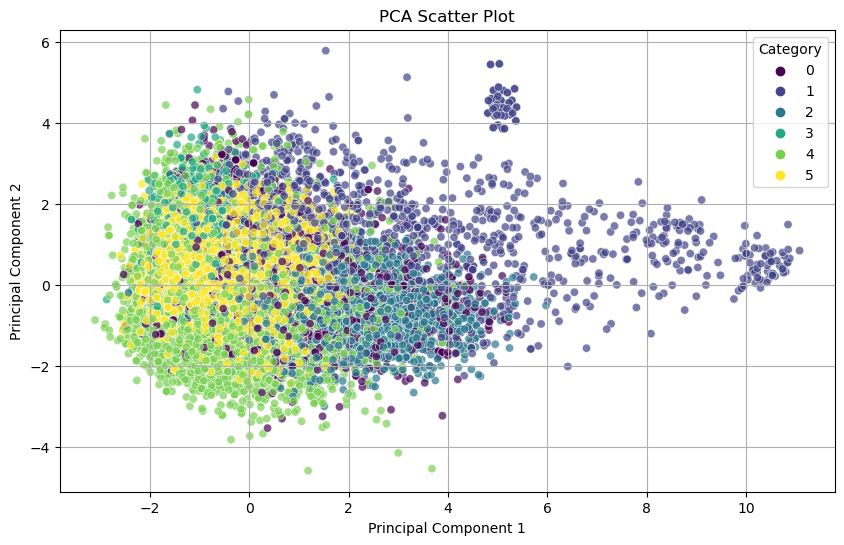

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', alpha=0.7, palette='viridis')

plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Category')
plt.grid()
plt.show()

In [58]:
import joblib
joblib.dump(best_estimator, 'modelo_mezcla_gaussiana.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']